## Simple returns and log returns

In [27]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

In [2]:
#Create a dataframe
df = pd.DataFrame(index=[2018,2019,2020], data=[100,90,72], columns=["Price"])
df

,Price
2018,100
2019,90
2020,72


In [3]:
simple_return = df.pct_change().dropna()
simple_return

,Price
2019,-0.1
2020,-0.2


In [4]:
simple_return.mean()

Price   -0.15
dtype: float64

In [5]:
# Mean returns are misleading

In [9]:
log_return = np.log(df/df.shift(1)).dropna()
log_return

,Price
2019,-0.105361
2020,-0.223144


In [10]:
log_return.mean()

Price   -0.164252
dtype: float64

In [12]:
# more accurate
100*np.exp(log_return.mean()*2)

Price    72.0
dtype: float64

In [18]:
Apple = yf.download("AAPL")

[*********************100%***********************]  1 of 1 completed


In [19]:
Apple

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100178,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094952,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087983,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090160,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092774,73449600
...,...,...,...,...,...,...
2022-05-24,140.809998,141.970001,137.330002,140.360001,140.360001,104132700
2022-05-25,138.429993,141.789993,138.339996,140.520004,140.520004,92482700
2022-05-26,137.389999,144.339996,137.139999,143.779999,143.779999,90601500


In [24]:
apple = Apple.Close.to_frame()
apple

,Close
Date,
1980-12-12,0.128348
1980-12-15,0.121652
1980-12-16,0.112723
1980-12-17,0.115513
1980-12-18,0.118862
...,...
2022-05-24,140.360001
2022-05-25,140.520004
2022-05-26,143.779999


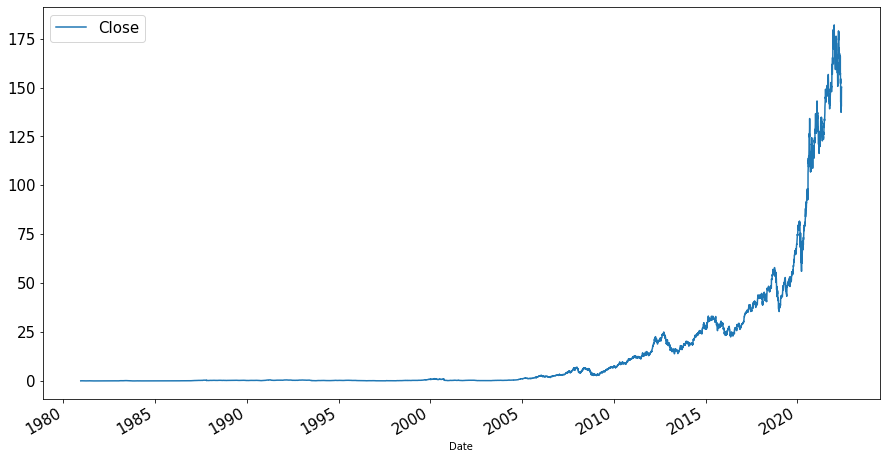

In [28]:
apple.plot(figsize=(15,8), fontsize=15)
plt.legend(loc="upper left", fontsize=15)
plt.show()

In [31]:
apple_roll = apple.rolling(window=10)
apple_roll

Rolling [window=10,center=False,axis=0,method=single]

In [32]:
apple_roll = apple_roll.mean()
apple_roll

,Close
Date,
1980-12-12,NaN
1980-12-15,NaN
1980-12-16,NaN
1980-12-17,NaN
1980-12-18,NaN
...,...
2022-05-24,143.018001
2022-05-25,142.420001
2022-05-26,142.542001


In [33]:
apple.rolling(window=10).median()

,Close
Date,
1980-12-12,NaN
1980-12-15,NaN
1980-12-16,NaN
1980-12-17,NaN
1980-12-18,NaN
...,...
2022-05-24,142.834999
2022-05-25,141.690002
2022-05-26,141.965004


In [34]:
apple.rolling(window=10).max() 

,Close
Date,
1980-12-12,NaN
1980-12-15,NaN
1980-12-16,NaN
1980-12-17,NaN
1980-12-18,NaN
...,...
2022-05-24,149.240005
2022-05-25,149.240005
2022-05-26,149.240005


In [36]:
apple.rolling(window=10, min_periods=5).max()

,Close
Date,
1980-12-12,NaN
1980-12-15,NaN
1980-12-16,NaN
1980-12-17,NaN
1980-12-18,0.128348
...,...
2022-05-24,149.240005
2022-05-25,149.240005
2022-05-26,149.240005


In [37]:
apple

,Close
Date,
1980-12-12,0.128348
1980-12-15,0.121652
1980-12-16,0.112723
1980-12-17,0.115513
1980-12-18,0.118862
...,...
2022-05-24,140.360001
2022-05-25,140.520004
2022-05-26,143.779999


In [38]:
#SMA50 = 50 days moving average
apple["SMA50"] = apple.rolling(window=50, min_periods=50).mean()
apple

,Close,SMA50
Date,,
1980-12-12,0.128348,NaN
1980-12-15,0.121652,NaN
1980-12-16,0.112723,NaN
1980-12-17,0.115513,NaN
1980-12-18,0.118862,NaN
...,...,...
2022-05-24,140.360001,161.402000
2022-05-25,140.520004,161.110601
2022-05-26,143.779999,160.794401


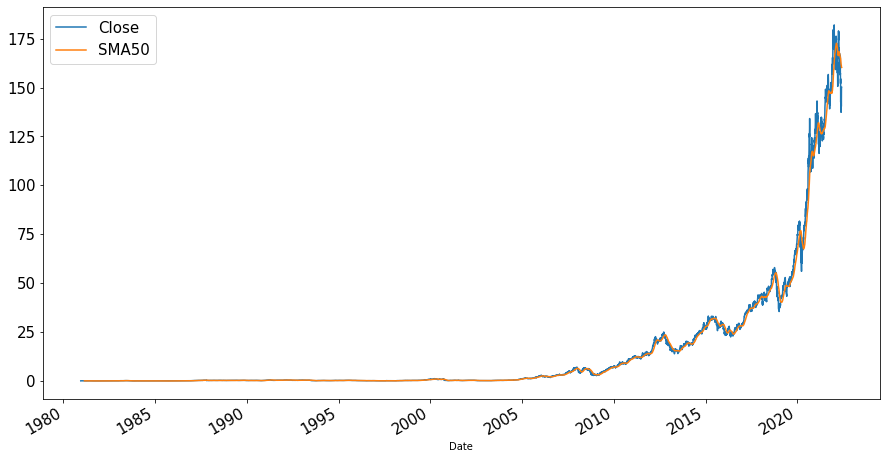

In [39]:
apple.plot(figsize=(15,8), fontsize=15)
plt.legend(loc="upper left", fontsize=15)
plt.show()